# Combine a Matplotlib Basemap with IPython Widgets

This is an experiment in creating a [Jupyter](https://jupyter.org) notebook showing a world map with different parameters (including map projection) by combining a [Matplotlib Basemap](http://matplotlib.org/basemap/index.html) and [IPython widgets](https://ipywidgets.readthedocs.io/en/latest/index.html).

Tested on Python 3.5, basemap 1.0.7, and ipywidgets 4.1.1. 

In [1]:
# Make plots appear inline (inside the Jupyter notebook).
%matplotlib inline

In [2]:
import datetime

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, supported_projections
from ipywidgets import interact, interact_manual, FloatSlider

Get a list of supported projection names (no, there seems to be no single ready-made list):

In [3]:
lines = supported_projections.strip().split('\n')
proj_names = [line.strip().split()[0] for line in lines]

In [4]:
print(sorted(proj_names))

['aea', 'aeqd', 'cass', 'cea', 'cyl', 'eck4', 'eqdc', 'gall', 'geos', 'gnom', 'hammer', 'kav7', 'laea', 'lcc', 'mbtfpq', 'merc', 'mill', 'moll', 'npaeqd', 'nplaea', 'npstere', 'nsper', 'omerc', 'ortho', 'poly', 'robin', 'rotpole', 'sinu', 'spaeqd', 'splaea', 'spstere', 'stere', 'tmerc', 'vandg']


Create sliders without continuous update, since creating a map can take a few seconds (this effect shows only when replacing the `@interact_manual` decorator below with `@interact`):

In [5]:
lat_slider = FloatSlider(min=-90, max=90, step=0.1, continuous_update=False)
lon_slider = FloatSlider(min=-180, max=180, step=0.1, continuous_update=False)
hour_slider = FloatSlider(min=-12, max=12, step=1/60, continuous_update=False)

This function does the real work. Notice that some projections will create warnings or even errors when they need additional parameters!

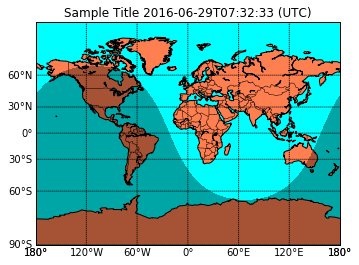

In [6]:
@interact_manual(lat_0=lat_slider, lon_0=lon_slider,
                 delta_hours=hour_slider,
                 projection=proj_names, title='Sample Title')
def show_map(lat_0=0, lon_0=0, delta_hours=0, projection='mill', title=''):
    "Show a world map."
    
    # Resolutions: c (crude), l (low), i (intermediate), h (high), f (full) or None. 
    map = Basemap(projection=projection, lat_0=lat_0, lon_0=lon_0, resolution='c')

    # Plot coastlines, draw label meridians and parallels.
    map.drawcoastlines() # linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

    # Plot countries.
    map.drawcountries() # linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

    # Plot parallels and meridians.
    map.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60), labels=[0, 0, 0, 1])
    
    # Fill continents 'coral' (with zorder=0), color wet areas 'aqua'
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='coral', lake_color='aqua')

    # Shade the night areas, with alpha transparency so the
    # map shows through. Use current time in UTC + delta.
    date = datetime.datetime.utcnow().timestamp() + delta_hours * 3600
    date = datetime.datetime.fromtimestamp(date)
    map.nightshade(date, alpha=0.35)

    plt.title('%s %s (UTC)' % (title, date.isoformat()[:19]))
    plt.show()